In [1]:
import sys
sys.path.append('/root')

In [2]:
import torch
import ptp_utils
import numpy as np
import PIL.Image as Image
import matplotlib.cm as cm

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
def show_self_attention_comp_grey(attention_maps, max_com=6, res=16):
    u, s, vh = np.linalg.svd((attention_maps - torch.mean(attention_maps, axis=1, keepdim=True)).cpu().numpy())
    images = []
    for i in range(max_com):
        image = vh[i].reshape(res, res)
        image = image - image.min()
        image = 255 * image / image.max()
        image = np.repeat(np.expand_dims(image, axis=2), 3, axis=2).astype(np.uint8)
        image = Image.fromarray(image).resize((256, 256))
        image = np.array(image)
        images.append(image)
    ptp_utils.view_images(np.concatenate(images, axis=1))

def show_self_attention_comp_heatmap(attention_maps, max_com=6, res=16):
    u, s, vh = np.linalg.svd((attention_maps - torch.mean(attention_maps, axis=1, keepdim=True)).cpu().numpy())

    images = []
    for i in range(max_com):
        image = vh[i].reshape(res, res)
        image = image - image.min()
        image = image / image.max()  # Normalize to [0, 1]

        # Apply a colormap
        heatmap = cm.viridis(image)[:, :, :3]  # Use only RGB channels, discard alpha
        heatmap = (heatmap * 255).astype(np.uint8)  # Scale to [0, 255]

        # Resize the image
        heatmap = Image.fromarray(heatmap).resize((256, 256))
        heatmap = np.array(heatmap)
        images.append(heatmap)
    
    ptp_utils.view_images(np.concatenate(images, axis=1))

def load_tensor_by_index(index):
    file_name = f"/root/am/attn_map_{index}.pt"
    tensor = torch.load(file_name)
    return tensor

def load_tensor_by_fn(fn):
    file_name = fn
    tensor = torch.load(file_name)
    return tensor

In [4]:
# Example of loading a tensor
index_to_load = 0  # Just an example, use the index you need
attention_maps = load_tensor_by_index(index_to_load)
attention_maps = attention_maps[0][2].mean(0, keepdim=False)
print(attention_maps.shape)

torch.Size([256, 256])


In [5]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def show_self_attention_comp_heatmap_save(attention_maps, max_com=6, res=16):
    u, s, vh = np.linalg.svd((attention_maps - torch.mean(attention_maps, axis=1, keepdim=True)).cpu().numpy())
    images = []
    for i in range(max_com):
        image = vh[i].reshape(res, res)
        image = image - image.min()
        image = image / image.max()  # Normalize to [0, 1]

        # Apply a colormap
        heatmap = cm.viridis(image)[:, :, :3]  # Use only RGB channels, discard alpha
        heatmap = (heatmap * 255).astype(np.uint8)  # Scale to [0, 255]

        # Resize the image
        heatmap_img = Image.fromarray(heatmap).resize((256, 256))
        
        # Save the image
        heatmap_img.save(f'/root/am/images_{i}.png')
        
        # Append to list
        images.append(np.array(heatmap_img))


In [24]:
# Example of loading a tensor
index_to_load = 0  # Just an example, use the index you need
attention_maps = load_tensor_by_index(index_to_load)
attention_maps = attention_maps[2][8].mean(0, keepdim=False)
print(attention_maps.shape)

show_self_attention_comp_heatmap_save(attention_maps, res=16)

torch.Size([256, 256])


torch.Size([64, 64])
vh len: (64, 64)
hs: (256, 256, 3)
vh len: (64, 64)
hs: (256, 256, 3)
vh len: (64, 64)
hs: (256, 256, 3)
vh len: (64, 64)
hs: (256, 256, 3)
vh len: (64, 64)
hs: (256, 256, 3)
vh len: (64, 64)
hs: (256, 256, 3)


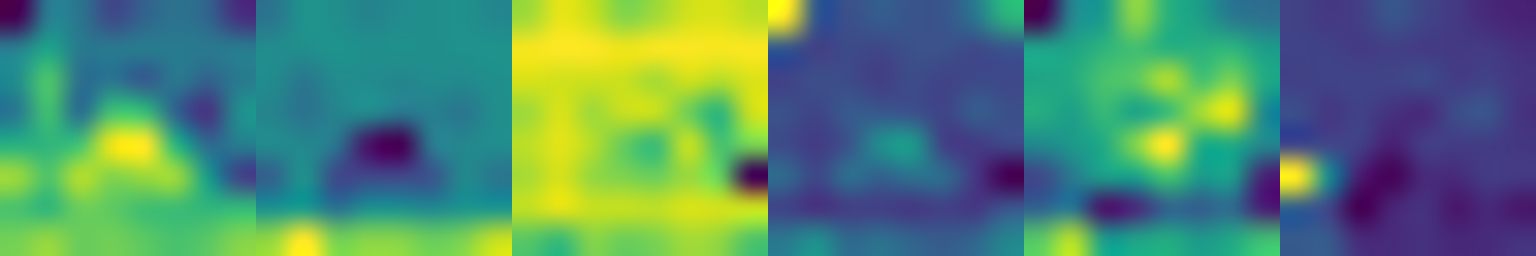

In [42]:
# Example of loading a tensor
index_to_load = 0  # Just an example, use the index you need
attention_maps = load_tensor_by_index(0)
attention_maps = attention_maps[2][5].mean(0, keepdim=False)
print(attention_maps.shape)

show_self_attention_comp_heatmap(attention_maps, res=8)